In [1]:
%load_ext autoreload
%autoreload 2
# this only works on startup!
from jax import config
config.update("jax_enable_x64", True)

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm
from signal_utils_1D import *


2024-10-10 14:22:55.480230: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-10 14:22:56.588586: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-10-10 14:22:56.588821: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-10-10 14:22:56.588835: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [2]:
N_objects = 2000
confidence = .95

objects_dict = {
  'delta_uniform': lambda : np.array([generate_random_object('delta', num_deltas=1, gaussian_mixture_position=False) for i in range(N_objects)]),
  # 'delta_nonuniform': lambda: np.array([generate_random_object('delta', num_deltas=1, gaussian_mixture_position=True) for i in range(N_objects)]),
  'white_noise': lambda : np.array([generate_random_object('white_noise') for i in range(N_objects)]),
  # 'pink_noise': lambda : np.array([sample_amplitude_object('pink_noise') for i in range(N_objects)]),
  '8_deltas_uniform': lambda :np.array([generate_random_object('delta', num_deltas=8, gaussian_mixture_position=False) for i in range(N_objects)]),
  # '8_deltas_nonuniform': lambda : np.array([sample_amplitude_object('delta', num_deltas=8, gaussian_mixture_position=True) for i in range(N_objects)]),
}


noise_sigma_list = [1e-6, 1e-5, 1e-4, 1e-3, 4e-3]

num_nyquist_samples = 16

mi_by_object = {}
mi_by_object_lo = {}
mi_by_object_hi = {}
for name, objects_fn in objects_dict.items():
  print(name)
  mutual_information = []
  mi_lo = []
  mi_hi = []
  for noise_sigma in tqdm(noise_sigma_list):

    initial_kernel, initial_params, optimized_params, objects, initial_mi, optimized_mi, optimized_mi_lower, optimized_mi_upper = optimize_PSF_and_estimate_mi(
        objects_fn, noise_sigma, num_nyquist_samples=num_nyquist_samples, verbose=True, confidence=confidence)

    mutual_information.append(optimized_mi)
    mi_lo.append(optimized_mi_lower)
    mi_hi.append(optimized_mi_upper)
  mi_by_object[name] = mutual_information
  mi_by_object_lo[name] = mi_lo
  mi_by_object_hi[name] = mi_hi

delta_uniform


  0%|                                                                       | 0/5 [00:00<?, ?it/s]

initial loss -13.742538939657203
computing optimized mi


2024-10-10 14:35:08.149861: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.

training:  92%|████████████████████████████████████████████▊    | 183/200 [07:17<00:40,  2.39s/it]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:17, 17.98s/it]
Evaluating NLL: 7it [00:35,  5.06s/it]
/2tb_nvme/hpinkard_waller/GitRepos/EncodingInformation/src/encoding_information/models/conditional_entropy_models.py:41: UserWarning: The images argument is not used in the Analytic Gaussian noise model.
  warnings.warn("The images argument is not used in the Analytic Gaussian noise model.")

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:15, 15.54s/it]
Evaluating NLL: 22it [00:15,  1.98it/s]
Evaluating NLL: 53it [00:15,  5.93it/s]
Evaluating NLL: 82it [00:15, 11.04it/s]
Evaluating NLL: 110it [00:15, 17.78it/s]
Evaluating NLL: 138it [00:16, 26.29it/s]


initial loss -10.53949980699176
computing optimized mi



training:  84%|█████████████████████████████████████████▍       | 169/200 [07:46<01:25,  2.76s/it]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.29s/it]
Evaluating NLL: 7it [00:02,  2.67it/s]
/2tb_nvme/hpinkard_waller/GitRepos/EncodingInformation/src/encoding_information/models/conditional_entropy_models.py:41: UserWarning: The images argument is not used in the Analytic Gaussian noise model.
  warnings.warn("The images argument is not used in the Analytic Gaussian noise model.")

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.36s/it]
Evaluating NLL: 27it [00:01, 25.41it/s]
Evaluating NLL: 49it [00:01, 48.65it/s]
Evaluating NLL: 80it [00:01, 86.64it/s]
Evaluating NLL: 104it [00:01, 111.74it/s]
Evaluating NLL: 137it [00:01, 154.09it/s]
Evaluating NLL: 165it [00:01, 181.37it/s]
Evaluating NLL: 200it [00:02, 94.32it/s] 

 40%|████████████████████████▍                                    | 2/5 [36:27<52:53, 1057.71s/it]

initial loss -7.127858971006706
computing optimized mi



training:  51%|████████████████████████▉                        | 102/200 [06:33<06:17,  3.86s/it]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.22s/it]
Evaluating NLL: 7it [00:02,  2.95it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.06s/it]
Evaluating NLL: 28it [00:01, 32.74it/s]
Evaluating NLL: 53it [00:01, 63.97it/s]
Evaluating NLL: 88it [00:01, 112.00it/s]
Evaluating NLL: 115it [00:01, 142.78it/s]
Evaluating NLL: 200it [00:01, 120.08it/s]

 60%|███████████████████████████████████▍                       | 3/5 [1:01:09<41:43, 1251.55s/it]

initial loss -4.038737691793173
computing optimized mi



training:  68%|█████████████████████████████████                | 135/200 [08:20<04:00,  3.70s/it]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.17s/it]
Evaluating NLL: 3it [00:01,  2.90it/s]
Evaluating NLL: 7it [00:02,  2.90it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.23s/it]
Evaluating NLL: 28it [00:01, 28.85it/s]
Evaluating NLL: 54it [00:01, 58.74it/s]
Evaluating NLL: 105it [00:01, 129.14it/s]
Evaluating NLL: 138it [00:01, 152.61it/s]
Evaluating NLL: 200it [00:01, 107.12it/s]

 80%|███████████████████████████████████████████████▏           | 4/5 [1:23:11<21:19, 1279.29s/it]

initial loss -2.754847795797976
computing optimized mi



training: 100%|█████████████████████████████████████████████████| 200/200 [13:31<00:00,  4.06s/it]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.40s/it]
Evaluating NLL: 7it [00:02,  2.66it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.25s/it]
Evaluating NLL: 11it [00:01, 10.14it/s]
Evaluating NLL: 23it [00:01, 23.15it/s]
Evaluating NLL: 31it [00:01, 27.54it/s]
Evaluating NLL: 50it [00:01, 50.50it/s]
Evaluating NLL: 62it [00:01, 62.02it/s]
Evaluating NLL: 72it [00:02, 56.53it/s]
Evaluating NLL: 81it [00:02, 52.76it/s]
Evaluating NLL: 89it [00:02, 47.46it/s]
Evaluating NLL: 97it [00:02, 52.31it/s]
Evaluating NLL: 111it [00:02, 67.61it/s]
Evaluating NLL: 123it [00:03, 63.83it/s]
Evaluating NLL: 133it [00:03, 70.68it/s]
Evaluating NLL: 142it [00:03, 64.09it/s]
Evaluating NLL: 150it [00:03, 55.86it/s]
Evaluating NLL: 170it [00:03, 84.34it/s]
Evaluating NLL: 181it [00:03, 83.53it/s]
Evaluating NLL: 191it [00:03, 72.44it/s]
Evaluating NLL: 200it [

white_noise


  0%|                                                                       | 0/5 [00:00<?, ?it/s]

initial loss -7.95673775135381
computing optimized mi



training:  22%|███████████▎                                      | 45/200 [02:06<07:15,  2.81s/it]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.28s/it]
Evaluating NLL: 7it [00:02,  2.82it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.04s/it]
Evaluating NLL: 25it [00:01, 29.79it/s]
Evaluating NLL: 53it [00:01, 66.35it/s]
Evaluating NLL: 83it [00:01, 106.54it/s]
Evaluating NLL: 114it [00:01, 145.92it/s]
Evaluating NLL: 141it [00:01, 171.56it/s]
Evaluating NLL: 168it [00:01, 186.87it/s]
Evaluating NLL: 200it [00:01, 110.83it/s]

 20%|███████████▊                                               | 1/5 [17:35<1:10:23, 1055.84s/it]

initial loss -4.490379101157371
computing optimized mi



training:  22%|███████████▎                                      | 45/200 [02:16<07:50,  3.03s/it]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.29s/it]
Evaluating NLL: 7it [00:02,  2.64it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.49s/it]
Evaluating NLL: 29it [00:01, 25.04it/s]
Evaluating NLL: 49it [00:01, 44.11it/s]
Evaluating NLL: 68it [00:01, 63.57it/s]
Evaluating NLL: 99it [00:01, 102.94it/s]
Evaluating NLL: 130it [00:02, 139.44it/s]
Evaluating NLL: 155it [00:02, 151.00it/s]
Evaluating NLL: 200it [00:02, 85.03it/s] 

 40%|███████████████████████▌                                   | 2/5 [40:10<1:01:34, 1231.40s/it]

initial loss -2.3486612081402756
computing optimized mi



training:  24%|███████████▊                                      | 47/200 [02:03<06:40,  2.62s/it]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.25s/it]
Evaluating NLL: 7it [00:02,  2.62it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.16s/it]
Evaluating NLL: 32it [00:01, 34.55it/s]
Evaluating NLL: 75it [00:01, 87.63it/s]
Evaluating NLL: 105it [00:01, 114.69it/s]
Evaluating NLL: 133it [00:01, 144.10it/s]
Evaluating NLL: 160it [00:01, 162.29it/s]
Evaluating NLL: 200it [00:01, 106.92it/s]

 60%|███████████████████████████████████▍                       | 3/5 [1:01:59<42:14, 1267.18s/it]

initial loss -0.09521487108452856
computing optimized mi



training:  23%|███████████▌                                      | 46/200 [01:56<06:28,  2.53s/it]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.24s/it]
Evaluating NLL: 7it [00:02,  2.92it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.12s/it]
Evaluating NLL: 33it [00:01, 36.94it/s]
Evaluating NLL: 73it [00:01, 87.32it/s]
Evaluating NLL: 110it [00:01, 133.74it/s]
Evaluating NLL: 200it [00:01, 124.12it/s]

 80%|███████████████████████████████████████████████▏           | 4/5 [1:20:10<19:57, 1197.61s/it]

initial loss -0.010469666610981726
computing optimized mi



training:  28%|██████████████▏                                   | 57/200 [02:25<06:03,  2.55s/it]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.21s/it]
Evaluating NLL: 7it [00:02,  2.93it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.21s/it]
Evaluating NLL: 34it [00:01, 35.44it/s]
Evaluating NLL: 55it [00:01, 58.22it/s]
Evaluating NLL: 77it [00:01, 83.49it/s]
Evaluating NLL: 106it [00:01, 120.32it/s]
Evaluating NLL: 130it [00:01, 139.63it/s]
Evaluating NLL: 200it [00:01, 103.25it/s]

100%|███████████████████████████████████████████████████████████| 5/5 [1:32:55<00:00, 1115.10s/it]


8_deltas_uniform


  0%|                                                                       | 0/5 [00:00<?, ?it/s]

initial loss -12.221227080743
computing optimized mi



training: 100%|█████████████████████████████████████████████████| 200/200 [08:35<00:00,  2.58s/it]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.17s/it]
Evaluating NLL: 7it [00:02,  2.94it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.15s/it]
Evaluating NLL: 24it [00:01, 26.08it/s]
Evaluating NLL: 50it [00:01, 57.31it/s]
Evaluating NLL: 69it [00:01, 77.65it/s]
Evaluating NLL: 88it [00:01, 93.04it/s]
Evaluating NLL: 105it [00:01, 102.58it/s]
Evaluating NLL: 121it [00:01, 111.04it/s]
Evaluating NLL: 136it [00:01, 117.68it/s]
Evaluating NLL: 163it [00:02, 153.46it/s]
Evaluating NLL: 200it [00:02, 89.54it/s] 

 20%|███████████▊                                               | 1/5 [25:07<1:40:28, 1507.06s/it]

initial loss -8.86695870358501
computing optimized mi



training:  62%|██████████████████████████████▍                  | 124/200 [05:34<03:24,  2.70s/it]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.46s/it]
Evaluating NLL: 7it [00:02,  2.52it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.18s/it]
Evaluating NLL: 26it [00:01, 27.61it/s]
Evaluating NLL: 49it [00:01, 54.53it/s]
Evaluating NLL: 68it [00:01, 73.64it/s]
Evaluating NLL: 86it [00:01, 92.56it/s]
Evaluating NLL: 111it [00:01, 124.13it/s]
Evaluating NLL: 136it [00:01, 150.66it/s]
Evaluating NLL: 160it [00:01, 171.55it/s]
Evaluating NLL: 200it [00:02, 96.32it/s] 

 40%|███████████████████████▌                                   | 2/5 [48:46<1:12:45, 1455.27s/it]

initial loss -5.931953954298877
computing optimized mi



training:  67%|████████████████████████████████▊                | 134/200 [05:21<02:38,  2.40s/it]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:00,  1.04it/s]
Evaluating NLL: 7it [00:02,  3.39it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:00,  1.00it/s]
Evaluating NLL: 31it [00:01, 38.28it/s]
Evaluating NLL: 61it [00:01, 77.40it/s]
Evaluating NLL: 84it [00:01, 99.77it/s]
Evaluating NLL: 105it [00:01, 117.60it/s]
Evaluating NLL: 125it [00:01, 134.32it/s]
Evaluating NLL: 145it [00:01, 143.62it/s]
Evaluating NLL: 169it [00:01, 166.71it/s]
Evaluating NLL: 200it [00:01, 106.38it/s]

 60%|███████████████████████████████████▍                       | 3/5 [1:18:03<53:06, 1593.21s/it]

initial loss -2.5735354571893465
computing optimized mi



training:  64%|███████████████████████████████▎                 | 128/200 [04:20<02:26,  2.03s/it]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.15s/it]
Evaluating NLL: 7it [00:02,  3.12it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:00,  1.04it/s]
Evaluating NLL: 25it [00:01, 31.78it/s]
Evaluating NLL: 61it [00:01, 82.14it/s]
Evaluating NLL: 85it [00:01, 110.11it/s]
Evaluating NLL: 121it [00:01, 160.53it/s]
Evaluating NLL: 154it [00:01, 198.66it/s]
Evaluating NLL: 200it [00:01, 123.79it/s]

 80%|███████████████████████████████████████████████▏           | 4/5 [1:38:47<24:15, 1455.53s/it]

initial loss -1.2500069404955854
computing optimized mi



training:  70%|██████████████████████████████████▎              | 140/200 [04:02<01:43,  1.73s/it]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.34s/it]
Evaluating NLL: 7it [00:02,  2.78it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.07s/it]
Evaluating NLL: 21it [00:01, 24.18it/s]
Evaluating NLL: 46it [00:01, 56.10it/s]
Evaluating NLL: 77it [00:01, 97.80it/s]
Evaluating NLL: 108it [00:01, 138.03it/s]
Evaluating NLL: 133it [00:01, 126.76it/s]
Evaluating NLL: 159it [00:01, 151.29it/s]
Evaluating NLL: 200it [00:01, 100.10it/s]

100%|███████████████████████████████████████████████████████████| 5/5 [1:50:46<00:00, 1329.23s/it]


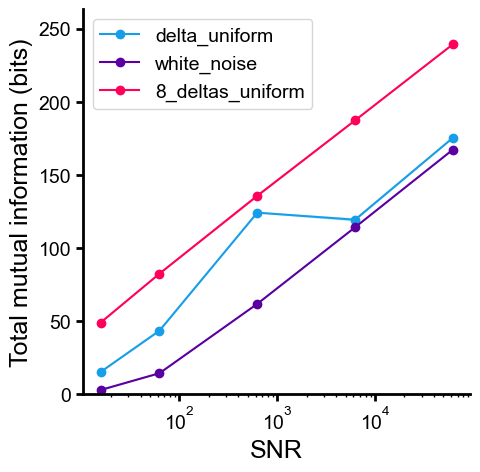

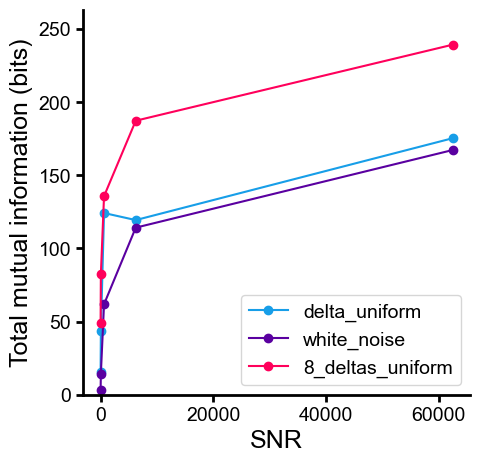

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

snr = (1 / (num_nyquist_samples)) / np.array(noise_sigma_list)

for object_name, mutual_information in mi_by_object.items():
    total_mi = np.array(mutual_information) * num_nyquist_samples
    total_mi_lo = np.array(mi_by_object_lo[object_name]) * num_nyquist_samples
    total_mi_hi = np.array(mi_by_object_hi[object_name]) * num_nyquist_samples

    # ax.plot(num_samples, mutual_information, 'o-')
    ax.semilogx(snr, total_mi, 'o-', label=object_name)
    ax.fill_between(snr, total_mi_lo, total_mi_hi, alpha=0.2)
    ax.set_xlabel('SNR')
    ax.set_ylabel('Total mutual information (bits)')

    ax.set(ylim=(0, max(1.1 * np.max(total_mi), ax.get_ylim()[1])))

clear_spines(ax)
ax.legend()

fig.savefig('/home/hpinkard_waller/figures/1d_signals/' + 'mi_vs_snr_log_scale' + '.pdf', transparent=True, dpi=600)


fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for object_name, mutual_information in mi_by_object.items():
    total_mi = np.array(mutual_information) * num_nyquist_samples

    # ax.plot(num_samples, mutual_information, 'o-')
    ax.plot(snr, total_mi, 'o-', label=object_name)
    ax.set_xlabel('SNR')
    ax.set_ylabel('Total mutual information (bits)')

    ax.set(ylim=(0, max(1.1 * np.max(total_mi), ax.get_ylim()[1])))

clear_spines(ax)
ax.legend()

fig.savefig('/home/hpinkard_waller/figures/1d_signals/' + 'mi_vs_snr_linear_scale' + '.pdf', transparent=True, dpi=600)
